In [4]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

from matplotlib import pyplot

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Prepare datasets

In [5]:
# df = pd.read_pickle("Train.pkl")
traindf = pd.read_csv("Training_dia.csv")
traindf['Date'] = pd.to_datetime(traindf['Date'])
traindf.set_index('Date', inplace=True)
traindf = traindf.asfreq('d')

# testdf = pd.read_pickle("Test.pkl")
testdf = pd.read_csv("Test_dia.csv")
testdf['Date'] = pd.to_datetime(testdf['Date'])
testdf.set_index('Date', inplace=True)
testdf = testdf.asfreq('d')

OutOfSampledf = pd.read_csv("Out_of_sample_dia.csv")
OutOfSampledf['Date'] = pd.to_datetime(OutOfSampledf['Date'])
OutOfSampledf.set_index('Date', inplace=True)
OutOfSampledf = OutOfSampledf.asfreq('d')

totaldf = pd.read_csv("Total_dia.csv")
totaldf['Date'] = pd.to_datetime(totaldf['Date'])
totaldf.set_index('Date', inplace=True)
totaldf = totaldf.asfreq('d')

trainTarget = traindf['Target'].copy()
testTarget = testdf['Target'].copy()
outOfSampleTarget = OutOfSampledf['Target'].copy()
totalTarget = totaldf['Target'].copy()

# Fit the model

In [12]:
model = ARIMA(trainTarget, order=(10,0,10), missing='drop')
model_fit = model.fit(disp=0)

In [13]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 Target   No. Observations:                  502
Model:                   ARMA(10, 10)   Log Likelihood                1591.683
Method:                       css-mle   S.D. of innovations              0.010
Date:                Wed, 01 Jul 2020   AIC                          -3139.366
Time:                        09:43:16   BIC                          -3046.557
Sample:                             0   HQIC                         -3102.954
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      0.740      0.459      -0.001       0.001
ar.L1.Target      0.3511        nan        nan        nan         nan         nan
ar.L2.Target     -0.1283        nan     

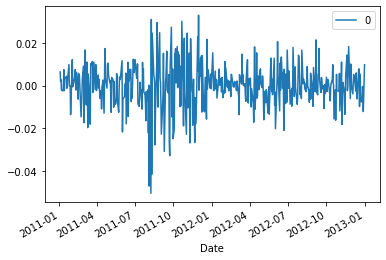

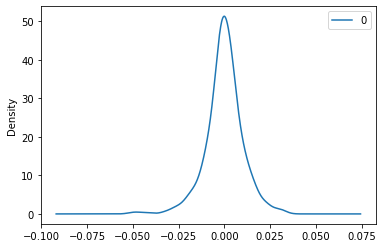

                0
count  502.000000
mean     0.000003
std      0.010155
min     -0.050267
25%     -0.004377
50%      0.000167
75%      0.005163
max      0.032812


In [14]:
# look at the residual to ensure there are no patterns (that is, look for constant mean and variance)
# normally distributed
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

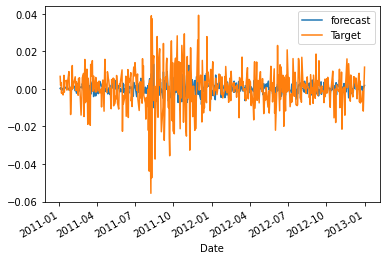

In [15]:
# plot the actuals against the fitted values
model_fit.plot_predict(dynamic=False)
plt.show()

# Out of sample forecast

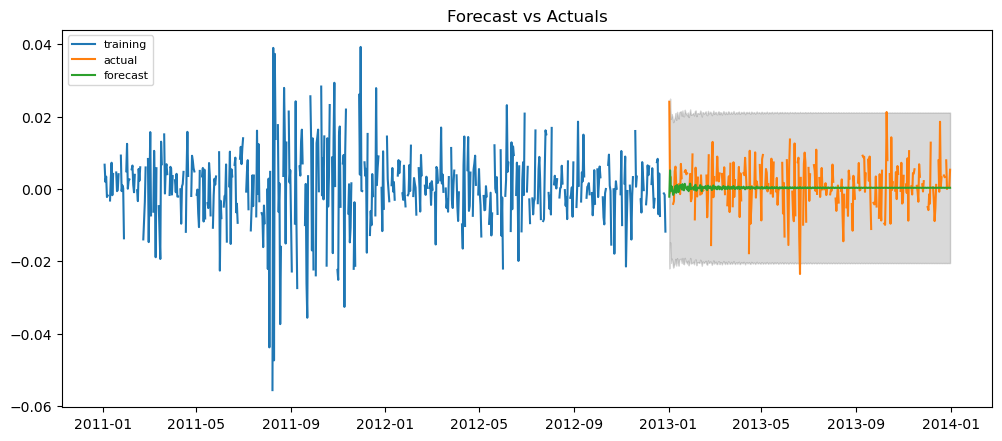

In [20]:
# Forecast on the test
fc, se, conf = model_fit.forecast(len(testTarget), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=testTarget.index)
lower_series = pd.Series(conf[:, 0], index=testTarget.index)
upper_series = pd.Series(conf[:, 1], index=testTarget.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(trainTarget, label='training')
plt.plot(testTarget, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# ARMA on train and test dataset

In [80]:
trainAndTest = pd.concat([traindf, testdf])

trainAndTestTarget = trainAndTest['Target']

model = ARIMA(trainAndTestTarget, order=(10,0,10), missing='drop')
model_fit = model.fit(disp=0)

In [81]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 Target   No. Observations:                  754
Model:                   ARMA(10, 10)   Log Likelihood                2472.373
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 01 Jul 2020   AIC                          -4900.745
Time:                        12:49:27   BIC                          -4798.986
Sample:                             0   HQIC                         -4861.545
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      4.456      0.000       0.000       0.001
ar.L1.Target     -0.2529        nan        nan        nan         nan         nan
ar.L2.Target     -0.1013      0.117     

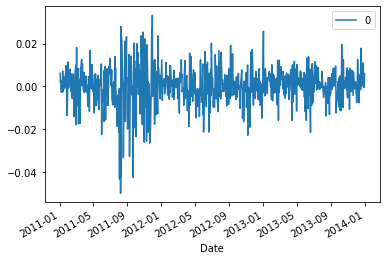

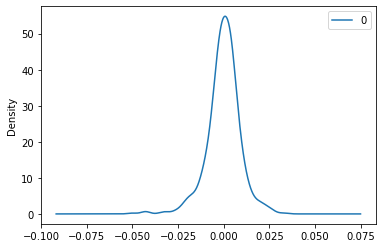

                0
count  754.000000
mean    -0.000028
std      0.009116
min     -0.050082
25%     -0.004345
50%      0.000287
75%      0.004825
max      0.033286


In [82]:
# look at the residual to ensure there are no patterns (that is, look for constant mean and variance)
# normally distributed
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

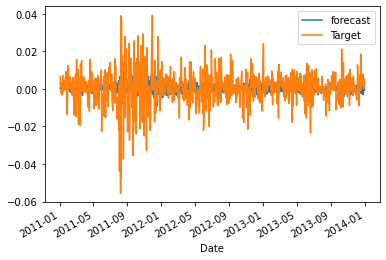

In [83]:
# plot the actuals against the fitted values
model_fit.plot_predict(dynamic=False)
plt.show()

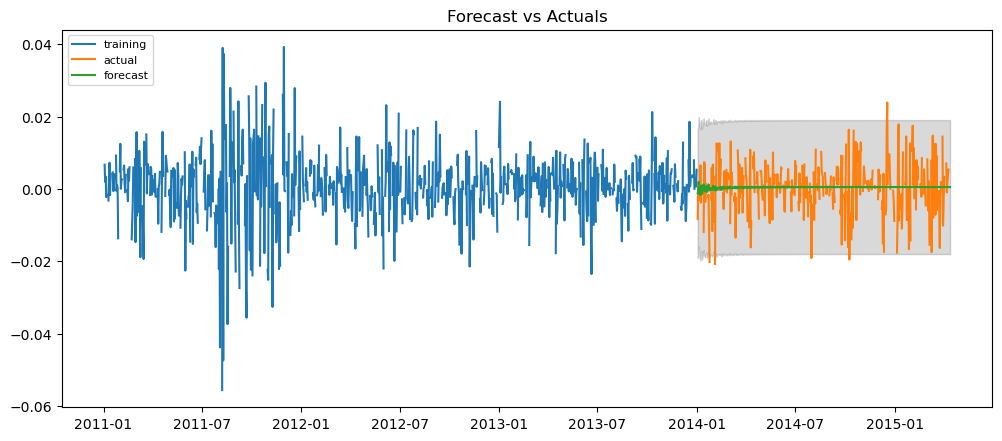

In [84]:
# Forecast on the test
fc, se, conf = model_fit.forecast(len(outOfSampleTarget), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=outOfSampleTarget.index)
lower_series = pd.Series(conf[:, 0], index=outOfSampleTarget.index)
upper_series = pd.Series(conf[:, 1], index=outOfSampleTarget.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(trainAndTestTarget, label='training')
plt.plot(outOfSampleTarget, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# ARMA In Sample (TOTAL DATASET)

In [29]:
model = ARIMA(totalTarget, order=(10,0,10), missing='drop')
model_fit = model.fit(disp=0)

In [30]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 Target   No. Observations:                 1075
Model:                   ARMA(10, 10)   Log Likelihood                3589.572
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 01 Jul 2020   AIC                          -7135.143
Time:                        09:53:50   BIC                          -7025.582
Sample:                             0   HQIC                         -7093.649
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005   4.57e-05     11.634      0.000       0.000       0.001
ar.L1.Target     -0.4469      0.800     -0.559      0.576      -2.015       1.121
ar.L2.Target     -0.6650      0.202     

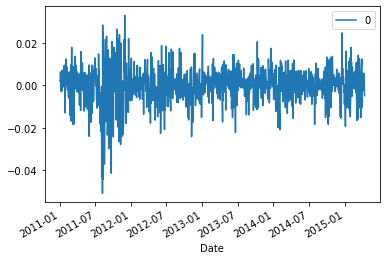

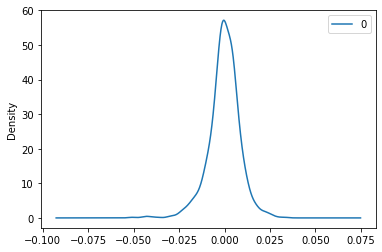

                 0
count  1075.000000
mean     -0.000146
std       0.008584
min      -0.050768
25%      -0.004311
50%       0.000043
75%       0.004702
max       0.032984


In [31]:
# look at the residual to ensure there are no patterns (that is, look for constant mean and variance)
# normally distributed
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

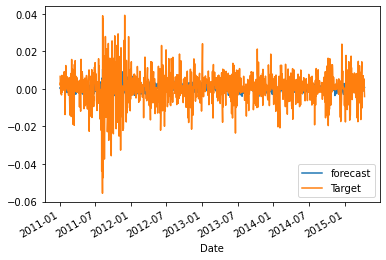

In [32]:
# plot the actuals against the fitted values
model_fit.plot_predict(dynamic=False)
plt.show()

# ARMA with a Rolling Train and Test dataset over the Out of Sample

In [46]:
trainAndTest = pd.concat([traindf, testdf])

trainAndTestTarget = trainAndTest['Target']

model = ARIMA(trainAndTestTarget, order=(10,0,10), missing='drop')
model_fit = model.fit(disp=0)

In [47]:
outOfSampleTarget = OutOfSampledf['Target'].copy()
outOfSampleTarget

Date
2014-01-02   -0.008253
2014-01-03    0.001705
2014-01-04         NaN
2014-01-05         NaN
2014-01-06   -0.003046
                ...   
2015-04-09    0.003629
2015-04-10    0.005393
2015-04-11         NaN
2015-04-12         NaN
2015-04-13   -0.004055
Freq: D, Name: Target, Length: 467, dtype: float64

In [48]:
ARMA_pred = []
ARMA_pred_index = []

n = 7
# n = len(outOfSampleTarget)
for k in range(n):
    print("Stage " + str(k) + "/" + str(n))
    
    # add the element to the "known" values
    targetValues = np.concatenate((trainAndTestTarget.values, outOfSampleTarget[[k]].values))
    targetIndex = np.concatenate((trainAndTestTarget.index, outOfSampleTarget[[k]].index))   
    trainAndTestTarget = pd.Series(targetValues, index=targetIndex)
        
    if outOfSampleTarget[[k]].isnull()[0] == True:
        next
    else:
        fc, se, conf = model_fit.forecast(1, alpha=0.05)  # 95% conf

        print(fc)
        
        # adding the prediction to the series of prediction
        ARMA_pred.append(fc[0])
        ARMA_pred_index.append(outOfSampleTarget[[k]].index)
        
        # refit the model
        model = ARIMA(trainAndTestTarget, order=(10,0,10), missing='drop')
        model_fit = model.fit(disp=0)

Stage 0/467
[-0.00120406]
Stage 1/467
[-0.00031973]
Stage 2/467
Stage 3/467
Stage 4/467
[0.00130995]
Stage 5/467
[0.00131472]
Stage 6/467
[-0.00224181]


In [49]:
ARMA_pred

[-0.0012040627517918706,
 -0.0003197259196575323,
 0.0013099532286770985,
 0.0013147207828551307,
 -0.002241813184290867]